In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
import pandas as pd
from plotly import express as px
import plotly.graph_objects as go

In [2]:
#dash

import pandas as pd
import dash
from dash import html
from dash import dcc
from dash.dependencies import Input, Output

In [3]:
app = dash.Dash(__name__)

In [4]:
data = pd.read_csv('CreditCardData.csv')

In [5]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [6]:
data.describe()

,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [7]:
pd.cut(data["Credit_Limit"],4)

0        (9707.725, 17977.15]
1        (1405.222, 9707.725]
2        (1405.222, 9707.725]
3        (1405.222, 9707.725]
4        (1405.222, 9707.725]
                 ...         
10122    (1405.222, 9707.725]
10123    (1405.222, 9707.725]
10124    (1405.222, 9707.725]
10125    (1405.222, 9707.725]
10126    (9707.725, 17977.15]
Name: Credit_Limit, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(1405.222, 9707.725] < (9707.725, 17977.15] < (17977.15, 26246.575] < (26246.575, 34516.0]]

In [8]:
pd.cut(data["Avg_Utilization_Ratio"],4)

0        (-0.000999, 0.25]
1        (-0.000999, 0.25]
2        (-0.000999, 0.25]
3           (0.749, 0.999]
4        (-0.000999, 0.25]
               ...        
10122          (0.25, 0.5]
10123         (0.5, 0.749]
10124    (-0.000999, 0.25]
10125    (-0.000999, 0.25]
10126    (-0.000999, 0.25]
Name: Avg_Utilization_Ratio, Length: 10127, dtype: category
Categories (4, interval[float64, right]): [(-0.000999, 0.25] < (0.25, 0.5] < (0.5, 0.749] < (0.749, 0.999]]

In [9]:
# Credit Limit Scoring Function
def credit_limit_score_v2(credit_limit):
    if credit_limit > 20000:
        return 3
    elif credit_limit > 10000:
        return 2
    elif credit_limit > 5000:
        return 1
    else:
        return 0

# Avg Utilization Ratio Scoring Function
def utilization_score_v2(utilization):
    if utilization < 0.1:
        return 3
    elif utilization < 0.3:
        return 2
    elif utilization < 0.5:
        return 1
    else:
        return 0

# Income Category Scoring Function
def income_score_v2(income):
    if income == '$120K +':
        return 3
    elif income in ['$80K - $120K', '$60K - $80K']:
        return 2
    elif income == '$40K - $60K':
        return 1
    elif income == 'Less than $40K':
        return 0
    else:  # Handling 'Unknown'
        return 1.5

# Applying the scoring functions to each customer
data['Credit_Limit_Score'] = data['Credit_Limit'].apply(credit_limit_score_v2)
data['Utilization_Score'] = data['Avg_Utilization_Ratio'].apply(utilization_score_v2)
data['Income_Score'] = data['Income_Category'].apply(income_score_v2)

# Calculating the total score
data['Total_Score_V2'] = data[['Credit_Limit_Score', 'Utilization_Score', 'Income_Score']].sum(axis=1)

# Categorizing based on the total score
def categorize_customer_v2(score):
    if score >= 8:
        return 'Super-Prime'
    elif score >= 6:
        return 'Prime'
    elif score >= 3:
        return 'Near-Prime'
    else:
        return 'Subprime'

data['Customer_Category'] = data['Total_Score_V2'].apply(categorize_customer_v2)

# Checking the distribution of the new categories
category_distribution_v2 = data['Customer_Category'].value_counts()
category_distribution_v2


Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [10]:
data['Customer_Category'].value_counts()

Near-Prime     3839
Subprime       3579
Prime          1539
Super-Prime    1170
Name: Customer_Category, dtype: int64

In [11]:
# calculate interest rate for each customer based on customer category
# https://www.forbes.com/advisor/credit-cards/average-credit-card-interest-rate/

def Calc_interest_rate(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 0.18/12
    elif Customer_Category == 'Prime':
        return 0.22/12
    elif Customer_Category == 'Near-Prime':
        return 0.24/12
    else:
        return 0.28/12

In [12]:
data["Interest_Rate_monthly"] = data["Customer_Category"].apply(Calc_interest_rate)

In [13]:
# calculate annual fee for each customer 
def Calc_monthly_fee(Card_Category):
    if Card_Category == 'Blue':
        return 0
    elif Card_Category == 'Silver':
        return 150/12
    elif Card_Category == 'Gold':
        return 450/12
    else:
        return 695/12

In [14]:
data["Card_Fee_Monthly"] = data["Card_Category"].apply(Calc_monthly_fee)

In [15]:
data["Card_Fee_Monthly"].dtype

dtype('float64')

In [16]:
#Late Fee for each customer
# https://www.cnbc.com/select/why-deep-subprime-borrowers-incur-more-interest/
def Calc_Late_Fee(Customer_Category):
    if Customer_Category == 'Super-Prime':
        return 1323/38
    elif Customer_Category == 'Prime':
        return 1983/41
    elif Customer_Category == 'Near-Prime':
        return 2407/44
    else:
        return 2676/45

In [17]:
data["Late_Fee_Monthly"] = data["Customer_Category"].apply(Calc_Late_Fee)

In [18]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1.625,0.061,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,3.714,0.105,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.333,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,2.333,0.760,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.500,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545


In [19]:
data["Card_Category"].value_counts()

Blue        9436
Silver       555
Gold         116
Platinum      20
Name: Card_Category, dtype: int64

In [20]:
#calculate Revenue
data["Monthy_Revenue"] = (data["Interest_Rate_monthly"] * data["Total_Revolving_Bal"]) + data["Card_Fee_Monthly"] + data["Late_Fee_Monthly"]


In [21]:
data.head(5)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,0.061,2,3,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.105,1,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.760,0,0,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,0.000,0,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545


In [22]:
# Encode the target variable 'Attrited_Flag'
encoder = LabelEncoder()
data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])


In [23]:
#making a current copy of the data before we start feature engineering
df=data.copy()

In [24]:
data['Attrition_Flag'] = encoder.fit_transform(data['Attrition_Flag'])
data["Education_Level"] = encoder.fit_transform(data['Education_Level'])
data["Gender"] = encoder.fit_transform(data["Gender"])
data["Marital_Status"] = encoder.fit_transform(data["Marital_Status"])
data['Income_Category'] = encoder.fit_transform(data['Income_Category'])
data['Card_Category'] = encoder.fit_transform(data['Card_Category'])
data['Customer_Category'] = encoder.fit_transform(data['Customer_Category'])

In [25]:
# Prepare the features (X) and the target (y)
X = data.drop(['Attrition_Flag','CLIENTNUM'], axis=1)  # Drop other non-feature columns as necessary
y = data['Attrition_Flag']

In [26]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
# Initialize the Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [28]:
# Train the model
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [29]:
# Predict on the test set
y_pred = rf_model.predict(X_test)
y_pred_proba = rf_model.predict_proba(X_test)[:, 1]

In [30]:
y_pred = pd.DataFrame(y_pred)

In [31]:
y_pred.value_counts()

1    2618
0     421
dtype: int64

In [32]:
y_pred_proba = pd.DataFrame(y_pred_proba)
y_pred_proba

,0
0,1.00
1,1.00
2,1.00
3,0.99
4,0.94
...,...
3034,1.00
3035,1.00
3036,0.99
3037,0.98


In [33]:
for x,y in zip(X.columns, rf_model.feature_importances_):
    print(f"{x} : {y}")

Customer_Age : 0.031016568498369933
Gender : 0.00824034040020032
Dependent_count : 0.012474746013997642
Education_Level : 0.011024044098655624
Marital_Status : 0.007932512555898125
Income_Category : 0.008904015246524071
Card_Category : 0.0014979227398904304
Months_on_book : 0.025989984586987366
Total_Relationship_Count : 0.060737578233709844
Months_Inactive_12_mon : 0.024819232850413347
Contacts_Count_12_mon : 0.024147195719460432
Credit_Limit : 0.032750874377001665
Total_Revolving_Bal : 0.09538275981743741
Avg_Open_To_Buy : 0.02886344456015459
Total_Amt_Chng_Q4_Q1 : 0.053360644635291894
Total_Trans_Amt : 0.17882066894403192
Total_Trans_Ct : 0.16566189300675893
Total_Ct_Chng_Q4_Q1 : 0.09747352514380174
Avg_Utilization_Ratio : 0.054606245465234654
Credit_Limit_Score : 0.004364916166025829
Utilization_Score : 0.005461209075563646
Income_Score : 0.006311256484105002
Total_Score_V2 : 0.010310009237158819
Customer_Category : 0.0030581036148880827
Interest_Rate_monthly : 0.002716731134351667

In [34]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)

# Print performance metrics
print(f'Accuracy: {accuracy}')
print(f'ROC-AUC: {roc_auc}')

Accuracy: 0.9542612701546561
ROC-AUC: 0.9864091655778672


In [35]:
# Get probability predictions for all instances
probabilities = rf_model.predict_proba(X)
probabilities = pd.DataFrame(probabilities)

In [36]:
data.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Avg_Utilization_Ratio,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue
0,768805383,1,45,1,3,3,1,2,0,39,...,0.061,2,3,2.0,7.0,1,0.018333,0.0,48.365854,62.610854
1,818770008,1,49,0,5,2,2,4,0,44,...,0.105,1,2,0.0,3.0,0,0.020000,0.0,54.704545,71.984545
2,713982108,1,51,1,3,2,1,3,0,36,...,0.000,0,3,2.0,5.0,0,0.020000,0.0,54.704545,54.704545
3,769911858,1,40,0,4,3,3,4,0,34,...,0.760,0,0,0.0,0.0,2,0.023333,0.0,59.466667,118.196667
4,709106358,1,40,1,3,5,1,2,0,21,...,0.000,0,3,2.0,5.0,0,0.020000,0.0,54.704545,54.704545


In [37]:
data_new = pd.concat((data,probabilities[1]),axis=1)

In [38]:
data_new

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit_Score,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue,1
0,768805383,1,45,1,3,3,1,2,0,39,...,2,3,2.0,7.0,1,0.018333,0.0,48.365854,62.610854,0.96
1,818770008,1,49,0,5,2,2,4,0,44,...,1,2,0.0,3.0,0,0.020000,0.0,54.704545,71.984545,0.98
2,713982108,1,51,1,3,2,1,3,0,36,...,0,3,2.0,5.0,0,0.020000,0.0,54.704545,54.704545,0.90
3,769911858,1,40,0,4,3,3,4,0,34,...,0,0,0.0,0.0,2,0.023333,0.0,59.466667,118.196667,0.86
4,709106358,1,40,1,3,5,1,2,0,21,...,0,3,2.0,5.0,0,0.020000,0.0,54.704545,54.704545,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,1,2,2,2,1,0,40,...,0,1,1.0,2.0,2,0.023333,0.0,59.466667,102.656667,1.00
10123,710638233,0,41,1,2,6,0,1,0,25,...,0,0,1.0,1.0,2,0.023333,0.0,59.466667,110.473333,0.73
10124,716506083,0,44,0,1,3,1,4,0,36,...,1,3,0.0,4.0,0,0.020000,0.0,54.704545,54.704545,0.09
10125,717406983,0,30,1,2,2,3,1,0,36,...,1,3,1.0,5.0,0,0.020000,0.0,54.704545,54.704545,0.33


In [39]:
#convert data to csv file
#data_new.to_csv('survival.csv', index=False)

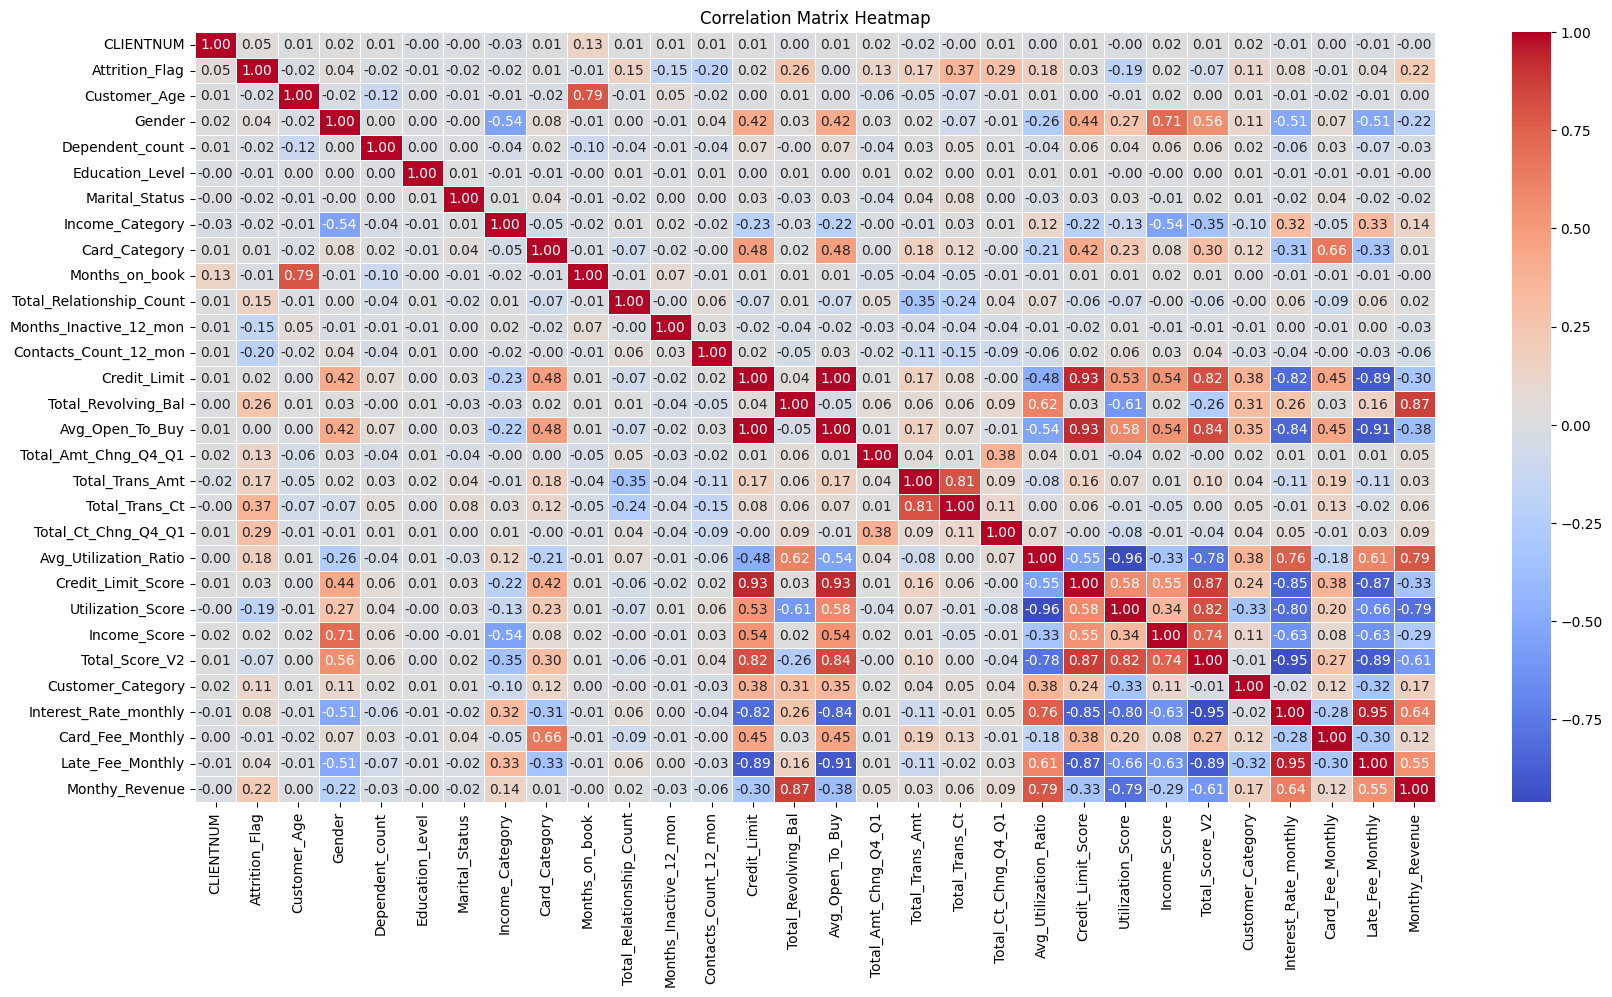

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))  # Adjust the size as needed
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', cbar=True, linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Deliverable 1 What is the current monthly gross revenue per customer. 

In [41]:
data_new.rename(columns={1: 'Attrition_Probability'}, inplace=True)

In [42]:
df['Adjusted Monthly_Revenue']=df['Monthy_Revenue']*data_new['Attrition_Probability']
df['Attrition_Probability']=data_new['Attrition_Probability']

In [43]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Utilization_Score,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue,Adjusted Monthly_Revenue,Attrition_Probability
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,3,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854,60.106420,0.96
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,2,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545,70.544855,0.98
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,49.234091,0.90
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667,101.649133,0.86
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,3,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,49.234091,0.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1,1.0,2.0,Subprime,0.023333,0.0,59.466667,102.656667,102.656667,1.00
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,0,1.0,1.0,Subprime,0.023333,0.0,59.466667,110.473333,80.645533,0.73
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,3,0.0,4.0,Near-Prime,0.020000,0.0,54.704545,54.704545,4.923409,0.09
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,3,1.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,18.052500,0.33


In [44]:
# Sum up the monthly revenue and adjusted monthly revenue
total_monthly_revenue = df['Monthy_Revenue'].sum()
total_adjusted_monthly_revenue = df['Adjusted Monthly_Revenue'].sum()

# Create a DataFrame with the total revenue data
total_revenue_df = pd.DataFrame({'Revenue Type': ['Monthy_Revenue', 'Adjusted Monthly Revenue'],
                                 'Total Revenue': [total_monthly_revenue, total_adjusted_monthly_revenue]})

# Create a bar chart
fig = px.bar(total_revenue_df, x='Revenue Type', y='Total Revenue', title='Total Monthly Revenue vs Adjusted Monthly Revenue',
             labels={'Total Revenue': 'Total Revenue', 'Revenue Type': 'Revenue Type'})

# Show the figure
fig.show()


In [45]:

# Sum up the monthly revenue and adjusted monthly revenue
total_monthly_revenue = df['Monthy_Revenue'].sum()
total_adjusted_monthly_revenue = df['Adjusted Monthly_Revenue'].sum()

# Calculate the loss in monthly revenue
loss_in_monthly_revenue = total_monthly_revenue - total_adjusted_monthly_revenue

# Create a DataFrame with the total revenue data
total_revenue_df = pd.DataFrame({'Revenue Type': ['Monthly Revenue', 'Adjusted Monthly Revenue'],
                                 'Total Revenue': [total_monthly_revenue, total_adjusted_monthly_revenue]})

# Create a bar chart
fig = px.bar(total_revenue_df, x='Revenue Type', y='Total Revenue', title=f'Our Model Predicts A Loss of ${loss_in_monthly_revenue:,.0f} in Monthly Revenue',
             labels={'Total Revenue': 'Total Revenue', 'Revenue Type': 'Revenue Type'},
             width=700,  # Adjust the width of the plot
             color='Revenue Type',  # Color the bars based on the revenue type
            )

# Update the appearance of the bars
fig.update_traces(marker_line_width=1.5,  # Set the width of the marker outline
                  marker_line_color='rgb(8, 48, 107)',  # Set the color of the marker outline
                  opacity=0.8  # Set the opacity of the bars
                 )

# Update layout
fig.update_layout(xaxis_tickangle=-45,  # Rotate x-axis labels for better readability
                  yaxis_title='Total Revenue',  # Set y-axis title
                  font=dict(family="Arial", size=12, color="black"),  # Set font properties
                  plot_bgcolor='white',  # Set plot background color
                  title_font=dict(size=20)  # Set title font size
                 )

# Show the figure
fig.show()


### What group was impacted the most?

In [46]:
df.groupby('Customer_Category')['Attrition_Probability'].mean() 

Customer_Category
Near-Prime     0.786663
Prime          0.826563
Subprime       0.903199
Super-Prime    0.847573
Name: Attrition_Probability, dtype: float64

In [47]:


# Histogram of attrition probability
fig = px.histogram(data_new, x='Attrition_Probability', title='Attrition Probability Distribution', nbins=5)
fig.show()

In [48]:
#columns of interest for stacked bar chart
stack_bar_data=df[['Card_Category','Total_Revolving_Bal','Interest_Rate_monthly','Card_Fee_Monthly','Late_Fee_Monthly','Monthy_Revenue']]
#fixxing monthly interest rate column for stacked bar chart
stack_bar_data['Interest_Rate_monthly'] = stack_bar_data['Total_Revolving_Bal'] * stack_bar_data['Interest_Rate_monthly']

C:\Users\nfs25\AppData\Local\Temp\ipykernel_13408\537805929.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [49]:
#highlights the issue of skewed data
import plotly.graph_objects as go
# Group by 'Card_Category' and sum the other columns
grouped_data = stack_bar_data.groupby('Card_Category').sum()

# Extract data for each variable
total_revolving_bal = grouped_data['Total_Revolving_Bal']
interest_rate_monthly = grouped_data['Interest_Rate_monthly']
card_fee_monthly = grouped_data['Card_Fee_Monthly']
late_fee_monthly = grouped_data['Late_Fee_Monthly']
monthly_revenue = grouped_data['Monthy_Revenue']

# Define the categories and colors
categories = grouped_data.index
colors = ['rgba(87, 140, 255, 0.6)', 'rgba(255, 193, 7, 0.6)', 'rgba(255, 87, 34, 0.6)', 'rgba(255, 23, 68, 0.6)', 'rgba(121, 85, 72, 0.6)']

# Create traces for each variable
trace_revolving_bal = go.Bar(x=categories, y=total_revolving_bal, name='Total Revolving Balance', marker_color=colors[0])
trace_interest_rate = go.Bar(x=categories, y=interest_rate_monthly, name='Interest Rate Monthly', marker_color=colors[1])
trace_card_fee = go.Bar(x=categories, y=card_fee_monthly, name='Card Fee Monthly', marker_color=colors[2])
trace_late_fee = go.Bar(x=categories, y=late_fee_monthly, name='Late Fee Monthly', marker_color=colors[3])
trace_monthly_revenue = go.Bar(x=categories, y=monthly_revenue, name='Monthly Revenue', marker_color=colors[4])

# Create the figure
fig = go.Figure(data=[trace_revolving_bal, trace_interest_rate, trace_card_fee, trace_late_fee, trace_monthly_revenue])

# Update layout
fig.update_layout(
    barmode='stack',  # Stacked bar chart
    title='Stacked Bar Chart of Financial Metrics by Card Category',
    xaxis_title='Card Category',
    yaxis_title='Total Amount',
    legend_title='Financial Metrics'
)

# Show the figure
fig.show()



In [50]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio',
       'Credit_Limit_Score', 'Utilization_Score', 'Income_Score',
       'Total_Score_V2', 'Customer_Category', 'Interest_Rate_monthly',
       'Card_Fee_Monthly', 'Late_Fee_Monthly', 'Monthy_Revenue',
       'Adjusted Monthly_Revenue', 'Attrition_Probability'],
      dtype='object')

In [51]:
stack_bar_data=df[['Customer_Category','Total_Revolving_Bal','Interest_Rate_monthly','Card_Fee_Monthly','Late_Fee_Monthly','Monthy_Revenue']]


In [52]:
#plotting stacked bar chart


# Group by 'Customer_Category' and sum the other columns
grouped_data = stack_bar_data.groupby('Customer_Category').sum()

# Extract data for each variable
total_revolving_bal = grouped_data['Total_Revolving_Bal']
interest_rate_monthly = grouped_data['Interest_Rate_monthly']
card_fee_monthly = grouped_data['Card_Fee_Monthly']
late_fee_monthly = grouped_data['Late_Fee_Monthly']
monthly_revenue = grouped_data['Monthy_Revenue']

# Define the categories and colors
categories = grouped_data.index
colors = ['rgba(87, 140, 255, 0.6)', 'rgba(255, 193, 7, 0.6)', 'rgba(255, 87, 34, 0.6)', 'rgba(255, 23, 68, 0.6)', 'rgba(121, 85, 72, 0.6)']

# Create traces for each variable
trace_revolving_bal = go.Bar(x=categories, y=total_revolving_bal, name='Total Revolving Balance', marker_color=colors[0])
trace_interest_rate = go.Bar(x=categories, y=interest_rate_monthly, name='Interest Rate Monthly', marker_color=colors[1])
trace_card_fee = go.Bar(x=categories, y=card_fee_monthly, name='Card Fee Monthly', marker_color=colors[2])
trace_late_fee = go.Bar(x=categories, y=late_fee_monthly, name='Late Fee Monthly', marker_color=colors[3])
trace_monthly_revenue = go.Bar(x=categories, y=monthly_revenue, name='Monthly Revenue', marker_color=colors[4])

# Create the figure
fig = go.Figure(data=[trace_revolving_bal, trace_interest_rate, trace_card_fee, trace_late_fee, trace_monthly_revenue])

# Update layout
fig.update_layout(
    barmode='stack',  # Stacked bar chart
    title='Stacked Bar Chart of Financial Metrics by Customer Category',
    xaxis_title='Customer Category',
    yaxis_title='Total Amount',
    legend_title='Financial Metrics'
)

# Show the figure
fig.show()


### Customer Segmentation

In [53]:
#classifying customers
data['Customer_Category']

0        1
1        0
2        0
3        2
4        0
        ..
10122    2
10123    2
10124    0
10125    0
10126    0
Name: Customer_Category, Length: 10127, dtype: int32

In [54]:

piechart_dict=dict(df['Customer_Category'].value_counts())


labels = list(piechart_dict.keys())
values = list(piechart_dict.values())

fig = go.Figure(data=[go.Pie(labels=labels, values=values)])


fig.update_layout(title='Customer Category Distribution')

fig.show()


In [55]:
#customers that provide the most revenue
df.groupby('Customer_Category')['Monthy_Revenue'].sum().sort_values(ascending=False)

Customer_Category
Subprime       346424.640000
Near-Prime     277175.956667
Prime          105096.415447
Super-Prime     67170.940351
Name: Monthy_Revenue, dtype: float64

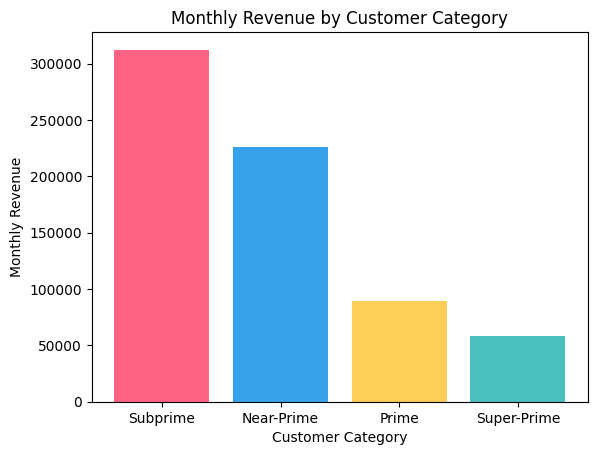

In [56]:
# Define the color palette
colors = ['#FF6384', '#36A2EB', '#FFCE56', '#4BC0C0']

# Group the monthly revenue by customer category
revenue_by_category = df.groupby('Customer_Category')['Adjusted Monthly_Revenue'].sum().sort_values(ascending=False)

# Plot the bar chart with custom colors
plt.bar(revenue_by_category.index, revenue_by_category.values, color=colors)
plt.xlabel('Customer Category')
plt.ylabel('Monthly Revenue')
plt.title('Monthly Revenue by Customer Category')
plt.show()


In [57]:
#knn model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

features=df.Attrition_Probability,
df.Monthy_Revenue,df.Customer_Age,df.Gender,df.Income_Category,df.Card_Category,
df.Interest_Rate_monthly, df.Card_Fee_Monthly, df.Late_Fee_Monthly


(0        0.018333
 1        0.020000
 2        0.020000
 3        0.023333
 4        0.020000
            ...   
 10122    0.023333
 10123    0.023333
 10124    0.020000
 10125    0.020000
 10126    0.020000
 Name: Interest_Rate_monthly, Length: 10127, dtype: float64,
 0         0.0
 1         0.0
 2         0.0
 3         0.0
 4         0.0
          ... 
 10122     0.0
 10123     0.0
 10124     0.0
 10125     0.0
 10126    12.5
 Name: Card_Fee_Monthly, Length: 10127, dtype: float64,
 0        48.365854
 1        54.704545
 2        54.704545
 3        59.466667
 4        54.704545
            ...    
 10122    59.466667
 10123    59.466667
 10124    54.704545
 10125    54.704545
 10126    54.704545
 Name: Late_Fee_Monthly, Length: 10127, dtype: float64)

C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



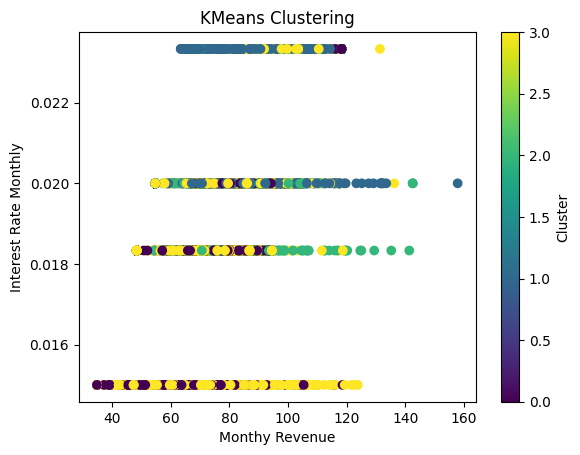

In [58]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define features correctly
features = df[['Attrition_Probability', 'Monthy_Revenue', 'Customer_Age', 'Gender', 'Income_Category', 'Card_Category', 'Interest_Rate_monthly', 'Card_Fee_Monthly', 'Late_Fee_Monthly']]

# Define numeric and categorical features
numeric_features = ['Attrition_Probability', 'Monthy_Revenue', 'Customer_Age', 'Interest_Rate_monthly', 'Card_Fee_Monthly', 'Late_Fee_Monthly']
categorical_features = ['Gender', 'Income_Category', 'Card_Category']

# Preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('scaler', MinMaxScaler(feature_range=(0, 1)))
])

# Preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the KMeans model
k = 4  # Choose the number of clusters
kmeans = KMeans(n_clusters=k)

# Create a pipeline with preprocessing and clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', kmeans)
])

# Fit the pipeline to the data
pipeline.fit(features)

# Predict cluster labels
cluster_labels = pipeline.named_steps['kmeans'].labels_

# Visualize the clusters
plt.scatter(features['Monthy_Revenue'], features['Interest_Rate_monthly'], c=cluster_labels, cmap='viridis')
plt.xlabel('Monthy Revenue')
plt.ylabel('Interest Rate Monthly')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\nfs25\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



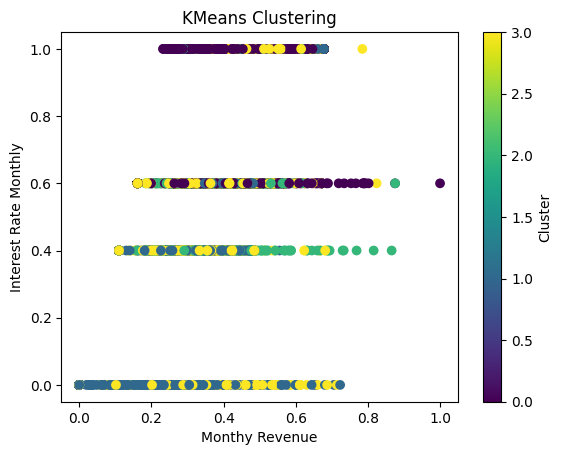

In [59]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define features correctly
features = df[['Attrition_Probability', 'Monthy_Revenue', 'Customer_Age', 'Gender', 'Income_Category', 'Card_Category', 'Interest_Rate_monthly', 'Card_Fee_Monthly', 'Late_Fee_Monthly']]

# Define numeric and categorical features
numeric_features = ['Attrition_Probability', 'Monthy_Revenue', 'Customer_Age', 'Interest_Rate_monthly', 'Card_Fee_Monthly', 'Late_Fee_Monthly']
categorical_features = ['Gender', 'Income_Category', 'Card_Category']

# Preprocess numeric features
scaler = MinMaxScaler(feature_range=(0, 1))
numeric_scaled = scaler.fit_transform(features[numeric_features])

# Preprocess categorical features
encoder = OneHotEncoder(handle_unknown='ignore')
categorical_encoded = encoder.fit_transform(features[categorical_features]).toarray()

# Get feature names after one-hot encoding
categorical_feature_names = encoder.get_feature_names_out(input_features=categorical_features)

# Concatenate numeric and encoded categorical features
X = pd.concat([pd.DataFrame(numeric_scaled, columns=numeric_features), pd.DataFrame(categorical_encoded, columns=categorical_feature_names)], axis=1)

# Define the KMeans model
k = 4  # Choose the number of clusters
kmeans = KMeans(n_clusters=k)

# Fit the model to the data
kmeans.fit(X)

# Predict cluster labels
cluster_labels = kmeans.labels_

# Visualize the clusters
plt.scatter(X['Monthy_Revenue'], X['Interest_Rate_monthly'], c=cluster_labels, cmap='viridis')
plt.xlabel('Monthy Revenue')
plt.ylabel('Interest Rate Monthly')
plt.title('KMeans Clustering')
plt.colorbar(label='Cluster')
plt.show()


In [60]:
df['Cluster'] = cluster_labels

In [61]:
df

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Income_Score,Total_Score_V2,Customer_Category,Interest_Rate_monthly,Card_Fee_Monthly,Late_Fee_Monthly,Monthy_Revenue,Adjusted Monthly_Revenue,Attrition_Probability,Cluster
0,768805383,1,45,M,3,High School,Married,$60K - $80K,Blue,39,...,2.0,7.0,Prime,0.018333,0.0,48.365854,62.610854,60.106420,0.96,3
1,818770008,1,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,0.0,3.0,Near-Prime,0.020000,0.0,54.704545,71.984545,70.544855,0.98,0
2,713982108,1,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,49.234091,0.90,1
3,769911858,1,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,0.0,0.0,Subprime,0.023333,0.0,59.466667,118.196667,101.649133,0.86,0
4,709106358,1,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,2.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,49.234091,0.90,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,1,50,M,2,Graduate,Single,$40K - $60K,Blue,40,...,1.0,2.0,Subprime,0.023333,0.0,59.466667,102.656667,102.656667,1.00,3
10123,710638233,0,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,...,1.0,1.0,Subprime,0.023333,0.0,59.466667,110.473333,80.645533,0.73,3
10124,716506083,0,44,F,1,High School,Married,Less than $40K,Blue,36,...,0.0,4.0,Near-Prime,0.020000,0.0,54.704545,54.704545,4.923409,0.09,0
10125,717406983,0,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,...,1.0,5.0,Near-Prime,0.020000,0.0,54.704545,54.704545,18.052500,0.33,3


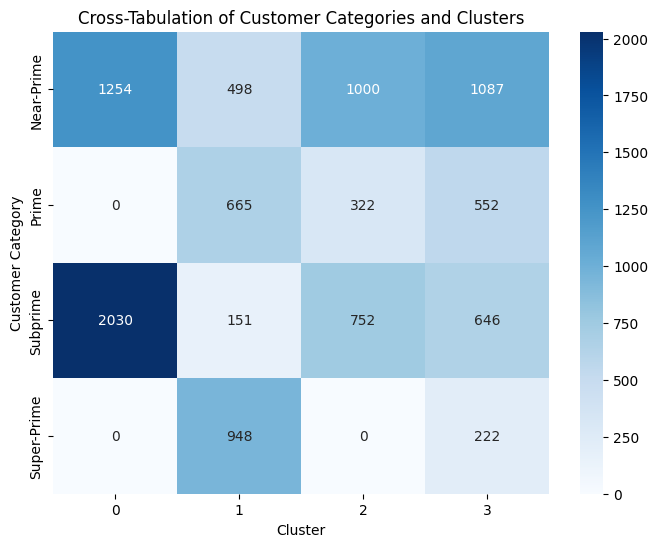

In [62]:
cross_tab = pd.crosstab(df['Customer_Category'], df['Cluster'])


plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab, annot=True, cmap='Blues', fmt='d')
plt.xlabel('Cluster')
plt.ylabel('Customer Category')
plt.title('Cross-Tabulation of Customer Categories and Clusters')
plt.show()
